In [3]:
import sys
sys.path.append("..")

from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


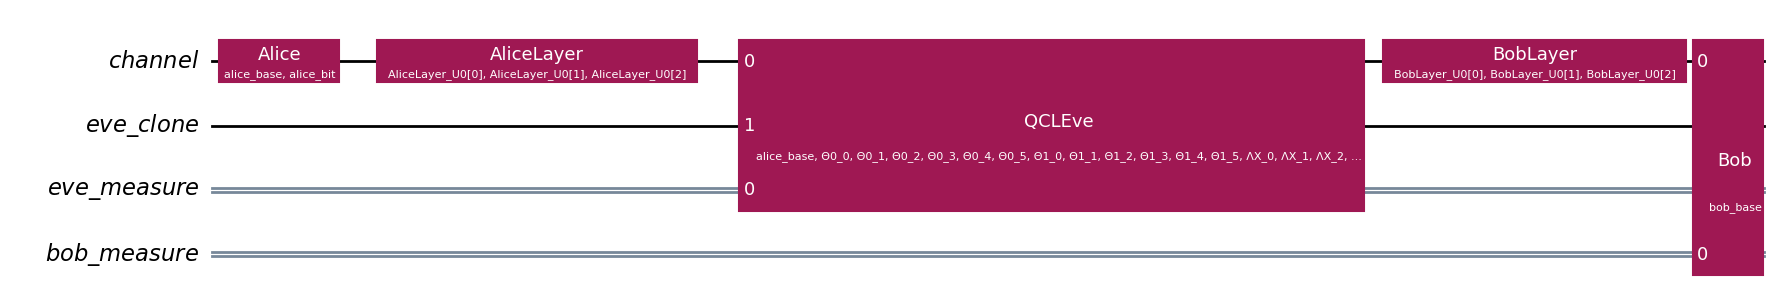

In [4]:
from protocol.connection_elements.QCLEve import QCLEve

layers = [SeparableLayer("AliceLayer"), SeparableLayer("BobLayer")]
eve = QCLEve()

protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0],eve,layers[1]], f_value=0.853, alpha=25,
                                        seed=0, learning_rate=0.1, batch_size=512)

qc, _ = protocol.qc_with_ctx()
qc.draw("mpl")

In [5]:
def train():
    bob_qber, eve_qber = [], []
    for epoch in range(50):
        loss = protocol.train()
        qber = protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')

    return bob_qber, eve_qber

# Krok 1 - trenowanie całego obwodu
Uczymy cały obwód z docelową dokładnością Boba 0.853 (wartość kompromisowa w PCCM pomiędzy dokładnością Boba i Eve)

In [6]:
protocol.f_value = 0.853
b_q, e_q = train()

epoch: 0, loss: -0.6242814660072327, QBER: {'bob_qber': np.float64(0.12132352941176472), 'eve_qber': np.float64(0.3345588235294118)}
epoch: 5, loss: -0.8195039629936218, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.14338235294117652)}
epoch: 10, loss: -0.8223731517791748, QBER: {'bob_qber': np.float64(0.16176470588235292), 'eve_qber': np.float64(0.15808823529411764)}
epoch: 15, loss: -0.8417609333992004, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.float64(0.1470588235294118)}
epoch: 20, loss: -0.8582758903503418, QBER: {'bob_qber': np.float64(0.17647058823529416), 'eve_qber': np.float64(0.13235294117647056)}
epoch: 25, loss: -0.8527259826660156, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.13602941176470584)}
epoch: 30, loss: -0.8507952690124512, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.13235294117647056)}
epoch: 35, loss: -0.8619106411933899, QBER: {'bob_qber': np.

<module 'matplotlib.pyplot' from '/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/matplotlib/pyplot.py'>

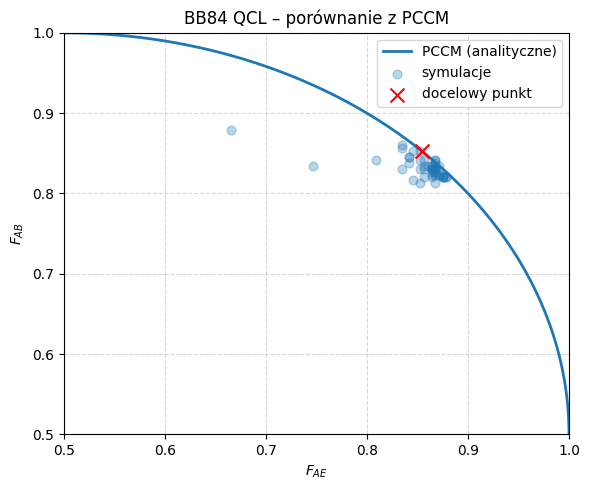

In [7]:
plt_fab_fae(b_q, e_q, 0.853)

### Wynik: udało osiągnąć się wydajność zbliżoną do PCCM

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8

In [8]:
protocol.freeze_elements(layers)

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [9]:
protocol.f_value = 0.8
b_q, e_q = train()

epoch: 0, loss: -0.8653318881988525, QBER: {'bob_qber': np.float64(0.21691176470588236), 'eve_qber': np.float64(0.0845588235294118)}
epoch: 5, loss: -0.8910794854164124, QBER: {'bob_qber': np.float64(0.19852941176470584), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 10, loss: -0.9009473323822021, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float64(0.09191176470588236)}
epoch: 15, loss: -0.9106302261352539, QBER: {'bob_qber': np.float64(0.2095588235294118), 'eve_qber': np.float64(0.09558823529411764)}
epoch: 20, loss: -0.9068995714187622, QBER: {'bob_qber': np.float64(0.21323529411764708), 'eve_qber': np.float64(0.09558823529411764)}
epoch: 25, loss: -0.9003146886825562, QBER: {'bob_qber': np.float64(0.19852941176470584), 'eve_qber': np.float64(0.09558823529411764)}
epoch: 30, loss: -0.9055044651031494, QBER: {'bob_qber': np.float64(0.21691176470588236), 'eve_qber': np.float64(0.08088235294117652)}
epoch: 35, loss: -0.8998329639434814, QBER: {'bob_qber': np

<module 'matplotlib.pyplot' from '/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/matplotlib/pyplot.py'>

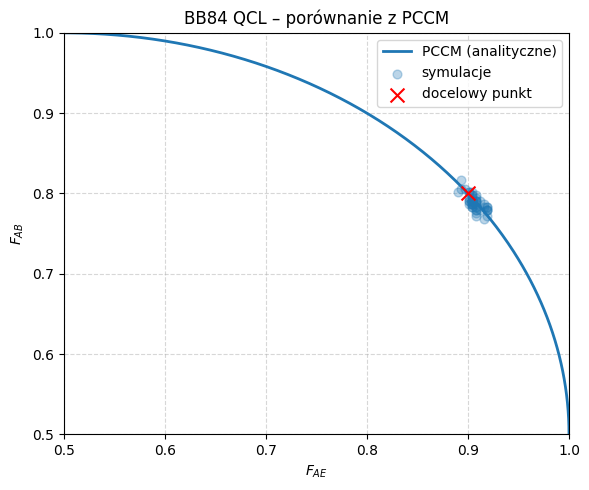

In [10]:
plt_fab_fae(b_q, e_q, 0.8)

### Wynik: Eve była w stanie poprawić swoją dokładność bez modyfikowania warst w Alice i Bobie

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [11]:
protocol.freeze_elements([eve])

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [12]:
def bob_loss(target, mask, outputs):
    bob_Z = outputs["channel"][:, 0]

    sign = 1 - 2 * target.long()
    bob_f = 0.5 * (1 + sign * bob_Z)

    bob_f = bob_f[mask].mean()

    loss = -bob_f
    return loss


In [13]:
protocol.loss = bob_loss
b_q, e_q = train()

epoch: 0, loss: -0.7911468744277954, QBER: {'bob_qber': np.float64(0.21323529411764708), 'eve_qber': np.float64(0.10661764705882348)}
epoch: 5, loss: -0.791310727596283, QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.09558823529411764)}
epoch: 10, loss: -0.7968012094497681, QBER: {'bob_qber': np.float64(0.2095588235294118), 'eve_qber': np.float64(0.09926470588235292)}
epoch: 15, loss: -0.7988744378089905, QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.09558823529411764)}
epoch: 20, loss: -0.7883080244064331, QBER: {'bob_qber': np.float64(0.21323529411764708), 'eve_qber': np.float64(0.09558823529411764)}
epoch: 25, loss: -0.7943101525306702, QBER: {'bob_qber': np.float64(0.20588235294117652), 'eve_qber': np.float64(0.09558823529411764)}
epoch: 30, loss: -0.7931197881698608, QBER: {'bob_qber': np.float64(0.21323529411764708), 'eve_qber': np.float64(0.09558823529411764)}
epoch: 35, loss: -0.7891613245010376, QBER: {'bob_qber': np

<module 'matplotlib.pyplot' from '/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/matplotlib/pyplot.py'>

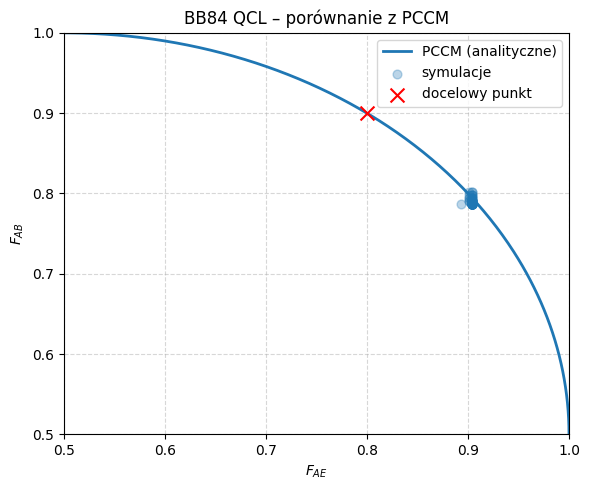

In [14]:
plt_fab_fae(b_q, e_q, 0.9)

### Wynik: Alice i Bob nie byli w stanie nadrobić strat spowodowanych przez Eve

# Końcowy obwód

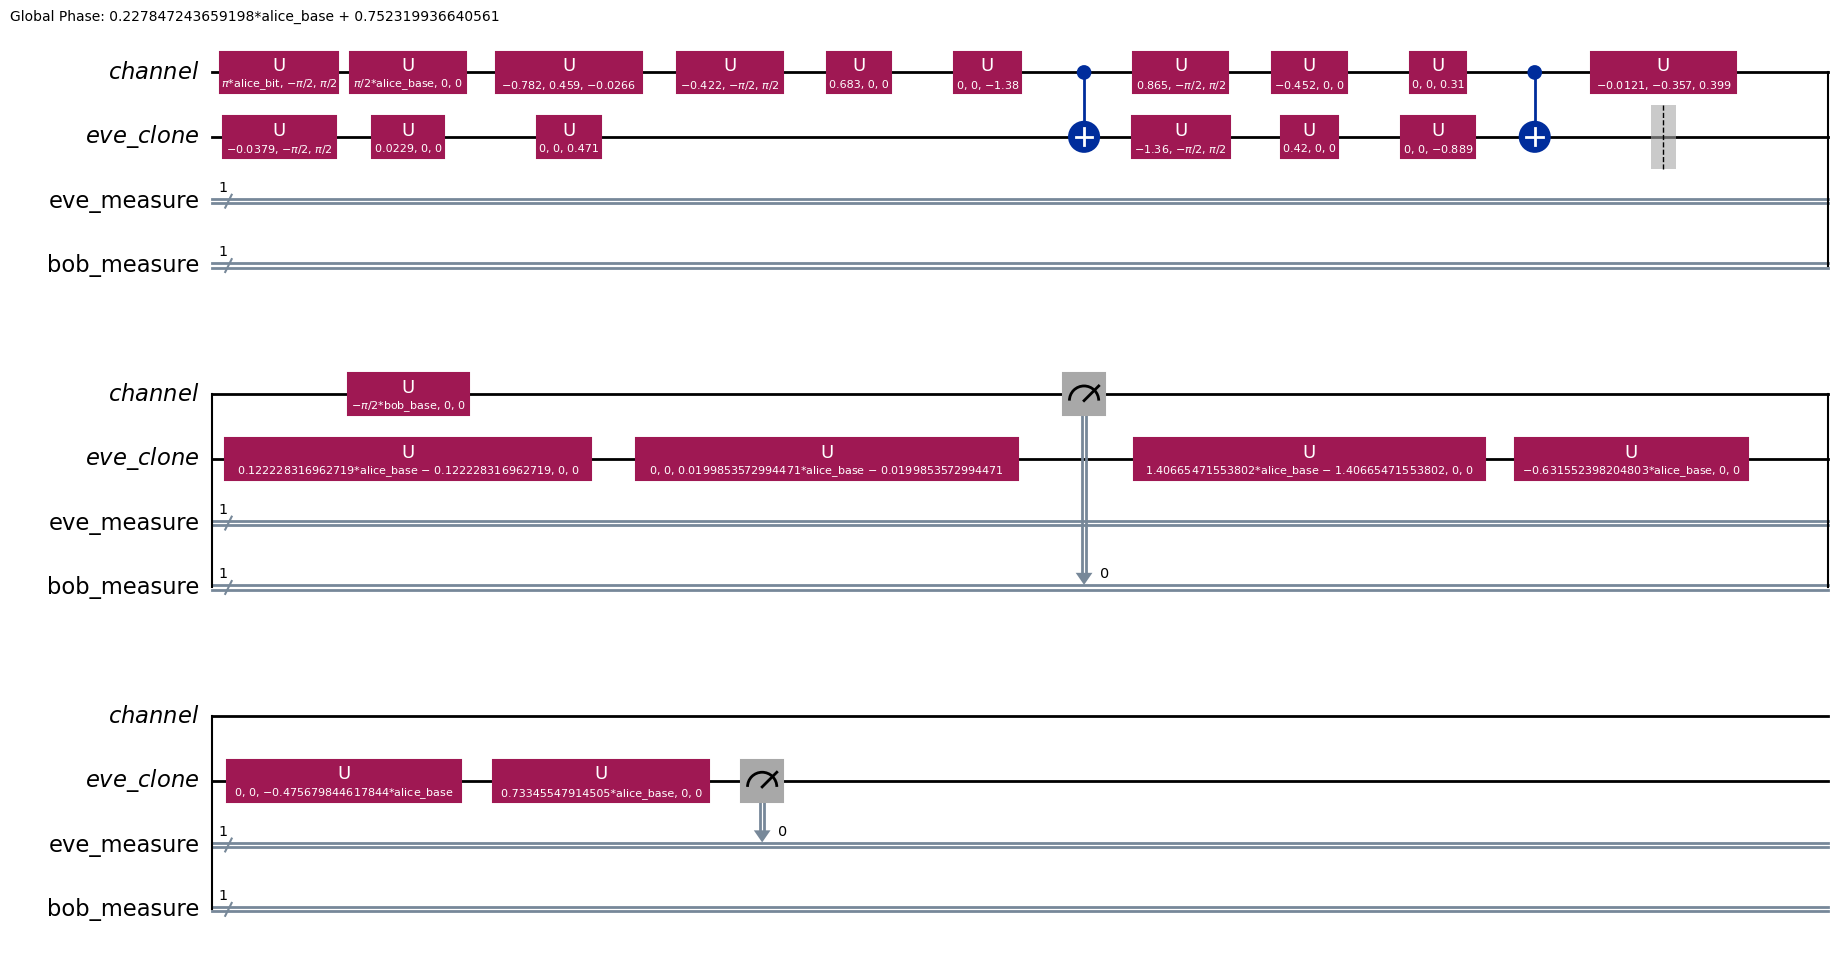

In [15]:
protocol._qc.assign_parameters(protocol.get_all_parameters()).draw("mpl")